
<center>

#Analiza policijskih intervencija u prometu

</center>

In [210]:
#!pip install scikit-posthocs

In [211]:
# učitavanje biblioteka
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import scikit_posthocs as sp

In [212]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [213]:
%cd /content/drive/MyDrive/Uvod u podatkovnu znanost

/content/drive/MyDrive/Uvod u podatkovnu znanost


#Osnovno o podacima

In [214]:
df = pd.read_csv("police_project.csv")
df.head()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


U prethodnoj tablici se može vidjeti kako izgleda prvih pet podataka. Vidimo da su podaci
strukturirani u tablicu (pomoću redova i stupaca). 


In [215]:
df.tail()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
91736,2015-12-31,20:27,NaN,M,1986.0,29.0,White,Speeding,Speeding,False,NaN,Warning,False,0-15 Min,False
91737,2015-12-31,20:35,NaN,F,1982.0,33.0,White,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False
91738,2015-12-31,20:45,NaN,M,1992.0,23.0,White,Other Traffic Violation,Moving violation,False,NaN,Warning,False,0-15 Min,False
91739,2015-12-31,21:42,NaN,M,1993.0,22.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
91740,2015-12-31,22:46,NaN,M,1959.0,56.0,Hispanic,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


U prethodnoj tablici se može vidjeti kako izgleda zadnjih pet podataka.


In [216]:
print(f"Data shape: {df.shape}")
print("Columns:")
for col in df.columns:
  print("\t", col)

Data shape: (91741, 15)
Columns:
	 stop_date
	 stop_time
	 county_name
	 driver_gender
	 driver_age_raw
	 driver_age
	 driver_race
	 violation_raw
	 violation
	 search_conducted
	 search_type
	 stop_outcome
	 is_arrested
	 stop_duration
	 drugs_related_stop


In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           91741 non-null  object 
 1   stop_time           91741 non-null  object 
 2   county_name         0 non-null      float64
 3   driver_gender       86406 non-null  object 
 4   driver_age_raw      86414 non-null  float64
 5   driver_age          86120 non-null  float64
 6   driver_race         86408 non-null  object 
 7   violation_raw       86408 non-null  object 
 8   violation           86408 non-null  object 
 9   search_conducted    91741 non-null  bool   
 10  search_type         3196 non-null   object 
 11  stop_outcome        86408 non-null  object 
 12  is_arrested         86408 non-null  object 
 13  stop_duration       86408 non-null  object 
 14  drugs_related_stop  91741 non-null  bool   
dtypes: bool(2), float64(3), object(10)
memory usage: 9.3+

Prethodna naredba "df.info()" nam daje informacije o stupcima tablice. Pa tako npr. vidimo da
je zadnji stupac "drugs_related_stop" koji ima 91741 non-null vrijednosti i da je dtype bool.


In [218]:
df.describe()

,county_name,driver_age_raw,driver_age
count,0.0,86414.000000,86120.000000
mean,NaN,1970.491228,34.011333
std,NaN,110.914909,12.738564
min,NaN,0.000000,15.000000
25%,NaN,1967.000000,23.000000
50%,NaN,1980.000000,31.000000
75%,NaN,1987.000000,43.000000
max,NaN,8801.000000,99.000000


Prethodnu naredbu "df.describe()" smo koristili za pronaći vrijednosti poput: count, mean,
std,... za svaku kategoriju podataka tj. za svaki stupac tablice.


In [219]:
df.shape

(91741, 15)

In [220]:
df.columns

Index(['stop_date', 'stop_time', 'county_name', 'driver_gender',
       'driver_age_raw', 'driver_age', 'driver_race', 'violation_raw',
       'violation', 'search_conducted', 'search_type', 'stop_outcome',
       'is_arrested', 'stop_duration', 'drugs_related_stop'],
      dtype='object')

Naredbu "df.shape" smo koristili za ispis veličine podataka (vidimo da ima 91741 redaka i 15
stupaca), a naredbu "df.columns" za ispis naziva stupaca iz tablice.


# Čišćenje podataka

In [221]:
df.isna()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91736,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
91737,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
91738,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
91739,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False


In [222]:
# postoji li u retku NaN vrijednost
df.isna().any(axis=1)

0        True
1        True
2        True
3        True
4        True
         ... 
91736    True
91737    True
91738    True
91739    True
91740    True
Length: 91741, dtype: bool

In [223]:
# postoji li u stupcu NaN vrijednost
df.isna().any(axis=0)

stop_date             False
stop_time             False
county_name            True
driver_gender          True
driver_age_raw         True
driver_age             True
driver_race            True
violation_raw          True
violation              True
search_conducted      False
search_type            True
stop_outcome           True
is_arrested            True
stop_duration          True
drugs_related_stop    False
dtype: bool

In [224]:
def rows_with_NaN(df):
  is_NaN = df.isna()
  has_NaN = is_NaN.any(axis=1)
  rows_with_NaN = df[has_NaN] 
  return rows_with_NaN

Uklonit ćemo one retke koji imaju 3 ili više nepoznatih vrijednosti, a one s manje od 3 ćemo popuniti vrijednostima u retku ispred.

In [225]:
# uklonit ćemo retke ako imaju 3 ili vise NaN vrijednosti
df.dropna(axis=0, thresh=df.shape[1]-3, inplace=True)

In [226]:
rows_with_NaN(df).tail()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
91736,2015-12-31,20:27,NaN,M,1986.0,29.0,White,Speeding,Speeding,False,NaN,Warning,False,0-15 Min,False
91737,2015-12-31,20:35,NaN,F,1982.0,33.0,White,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False
91738,2015-12-31,20:45,NaN,M,1992.0,23.0,White,Other Traffic Violation,Moving violation,False,NaN,Warning,False,0-15 Min,False
91739,2015-12-31,21:42,NaN,M,1993.0,22.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
91740,2015-12-31,22:46,NaN,M,1959.0,56.0,Hispanic,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [227]:
# stupci koji sadrze preostale NaN vrijednosti
list(df.columns[df.isna().any()])

['county_name', 'driver_gender', 'driver_age', 'search_type']

In [228]:
# popunit ćemo vrijednosti s onim vrijednostima u retku ispred
df.fillna(axis=0, method='ffill', inplace=True) 
rows_with_NaN(df).shape

(86407, 15)

In [229]:
df.isnull().sum()

stop_date                 0
stop_time                 0
county_name           86407
driver_gender             0
driver_age_raw            0
driver_age                0
driver_race               0
violation_raw             0
violation                 0
search_conducted          0
search_type              24
stop_outcome              0
is_arrested               0
stop_duration             0
drugs_related_stop        0
dtype: int64

Prethodne naredbe "data.isnull().sum()" i "data.isnull().values.any()" služe za provjeru da li ima
null vrijednosti.

Uklonimo stupce koji sadrže samo NaN vrijednosti.

In [230]:
df.dropna(axis=1, how='all').shape

(86407, 14)

In [231]:
df.drop('county_name', axis=1, inplace=True)

In [232]:
df.isnull().sum()

stop_date              0
stop_time              0
driver_gender          0
driver_age_raw         0
driver_age             0
driver_race            0
violation_raw          0
violation              0
search_conducted       0
search_type           24
stop_outcome           0
is_arrested            0
stop_duration          0
drugs_related_stop     0
dtype: int64

# Opis i vizualizacija podataka


In [233]:
print (df['stop_date'].min())
print (df['stop_date'].max())

2005-01-02
2015-12-31


Promatramo zaustavljenje vozača u prometu u vremenskom razdoblju od 2005-01-01 do 2015-01-31.


Ispišimo koje različite vrijednosti poprimaju pojedini stupci.




In [234]:
attribute_names = ['driver_gender',
        'driver_age', 'driver_race', 'violation_raw',
       'violation', 'search_conducted', 'search_type', 'stop_outcome',
       'is_arrested', 'stop_duration', 'drugs_related_stop']

for i in range(len(attribute_names)):
  print(f"Različite vrijednosti stupaca {attribute_names[i]}: {df[attribute_names[i]].unique()}")
  print()

Različite vrijednosti stupaca driver_gender: ['M' 'F']

Različite vrijednosti stupaca driver_age: [20. 40. 33. 19. 21. 23. 36. 35. 26. 39. 50. 47. 52. 38. 41. 28. 46. 32.
 58. 27. 43. 24. 17. 22. 44. 48. 34. 55. 51. 45. 29. 31. 37. 67. 25. 42.
 30. 18. 57. 49. 61. 70. 53. 60. 59. 64. 63. 54. 56. 66. 62. 69. 81. 68.
 76. 75. 74. 82. 65. 72. 16. 77. 73. 71. 80. 79. 78. 88. 15. 83. 86. 84.
 85. 87. 99. 89. 94. 90.]

Različite vrijednosti stupaca driver_race: ['White' 'Black' 'Asian' 'Hispanic' 'Other']

Različite vrijednosti stupaca violation_raw: ['Speeding' 'Call for Service' 'Equipment/Inspection Violation'
 'Other Traffic Violation' 'Registration Violation'
 'Special Detail/Directed Patrol' 'APB' 'Violation of City/Town Ordinance'
 'Suspicious Person' 'Motorist Assist/Courtesy' 'Warrant'
 'Seatbelt Violation']

Različite vrijednosti stupaca violation: ['Speeding' 'Other' 'Equipment' 'Moving violation' 'Registration/plates'
 'Seat belt']

Različite vrijednosti stupaca search_conducted:

Vizualizirajmo podatke.

driver_race
Asian        2.61
Black       14.17
Hispanic    11.00
Other        0.28
White       71.94
dtype: float64
violation
Equipment              12.75
Moving violation       18.78
Other                   5.00
Registration/plates     3.97
Seat belt               3.42
Speeding               56.09
dtype: float64
stop_outcome
Arrest Driver        2.98
Arrest Passenger     0.41
Citation            89.12
N/D                  0.68
No Action            0.68
Warning              6.13
dtype: float64


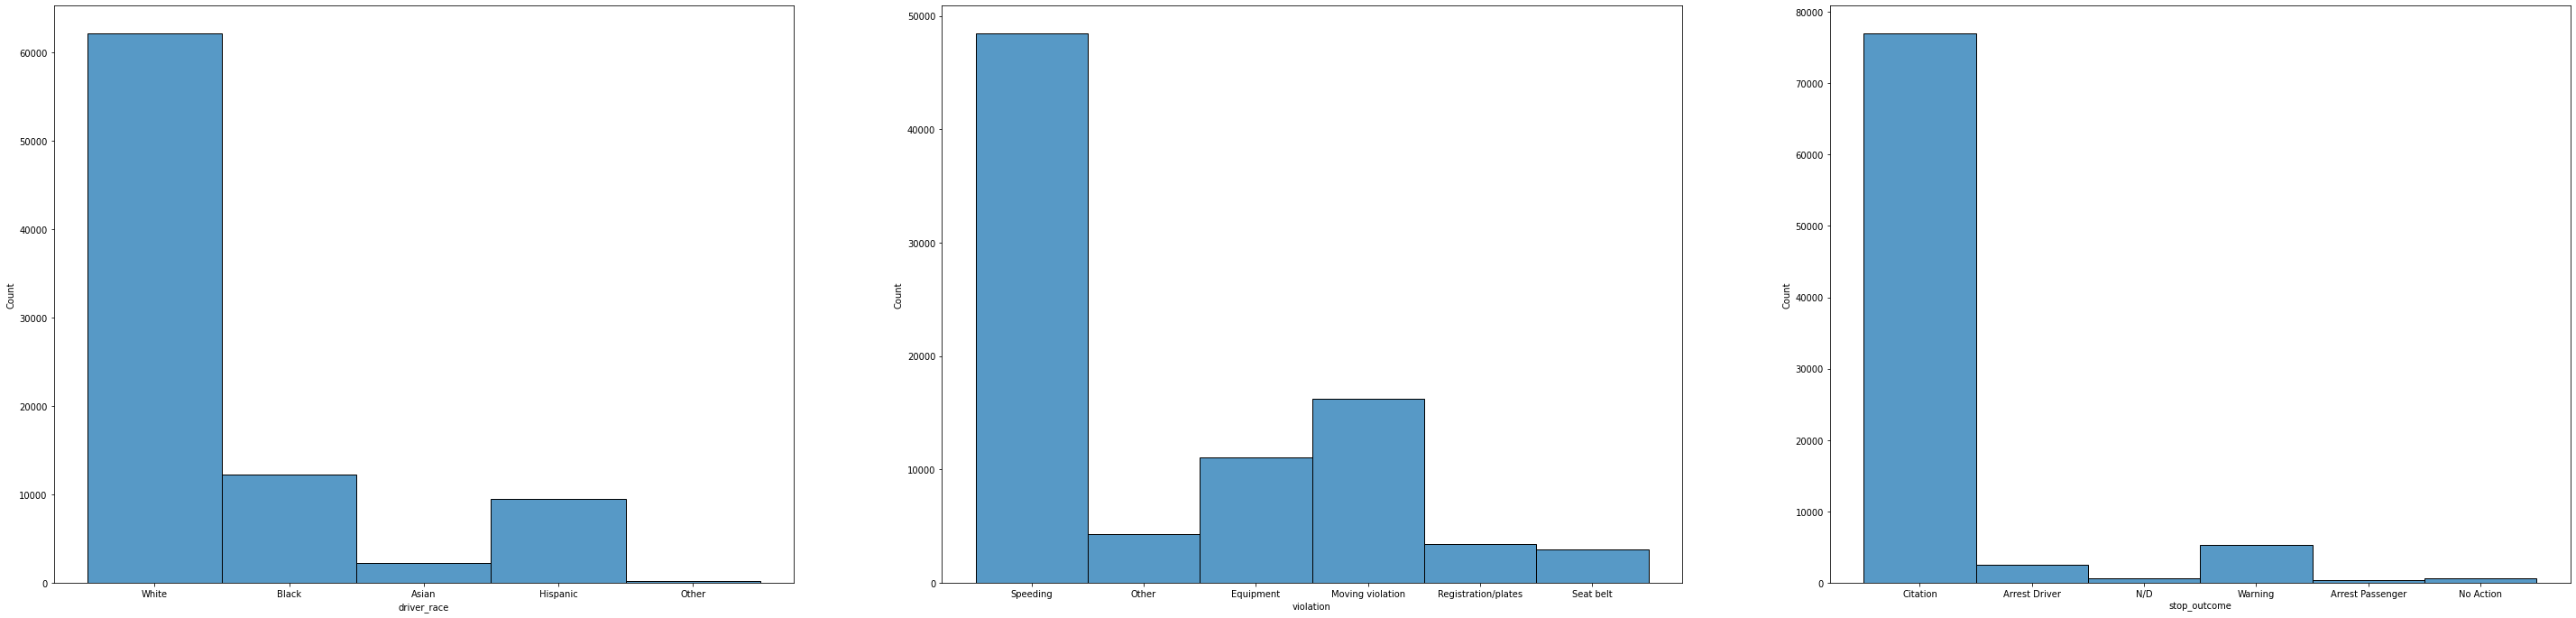

In [235]:
plt.figure(figsize=(50, 40))
attribute_names1 = ['driver_race','violation','stop_outcome']
for i in range(len(attribute_names1)):
  plt.subplot(3, 3, i+1)
  sns.histplot(x=attribute_names1[i], data=df)
  print(f"{round(df.groupby(attribute_names1[i]).size()/df.shape[0]*100,2)}")



driver_gender
F    27.21
M    72.79
dtype: float64
search_conducted
False    96.3
True      3.7
dtype: float64
is_arrested
False    96.61
True      3.39
dtype: float64
drugs_related_stop
False    99.06
True      0.94
dtype: float64


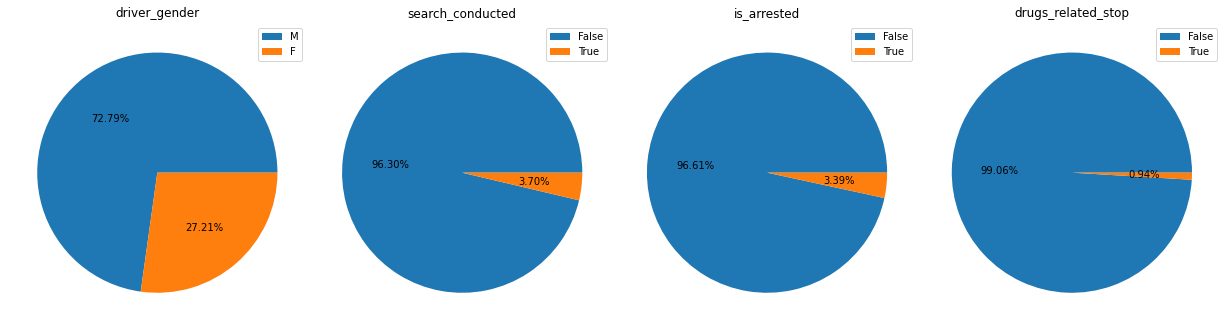

In [236]:
attribute_names = ['driver_gender','search_conducted','is_arrested','drugs_related_stop']
fig, ax = plt.subplots(1, 4, figsize=(40, 20))
ax = ax.ravel()
for i in range(len(attribute_names)):
    counts = df[attribute_names[i]].value_counts()
    ax[i].set_title(attribute_names[i])
    ax[i].pie(counts,autopct="%.2f%%")
    ax[i].legend(df[attribute_names[i]].unique(),loc='upper right')
    print(f"{round(df.groupby(attribute_names[i]).size()/df.shape[0]*100,2)}")
fig.tight_layout()
fig.set_figheight(10)
fig.set_figwidth(17)
plt.show()

Dobna distribucija.

In [237]:
df.groupby("violation").driver_age.describe()

,count,mean,std,min,25%,50%,75%,max
violation,,,,,,,,
Equipment,11019.0,31.784645,11.407762,16.0,23.0,28.0,38.0,89.0
Moving violation,16224.0,36.116556,13.182470,15.0,25.0,33.0,46.0,99.0
Other,4317.0,39.473477,13.040788,16.0,28.0,39.0,49.0,87.0
Registration/plates,3432.0,32.806527,11.033950,16.0,24.0,30.0,40.0,74.0
Seat belt,2952.0,32.206301,11.213122,17.0,24.0,29.0,38.0,77.0
Speeding,48463.0,33.528960,12.823453,15.0,23.0,30.0,42.0,90.0


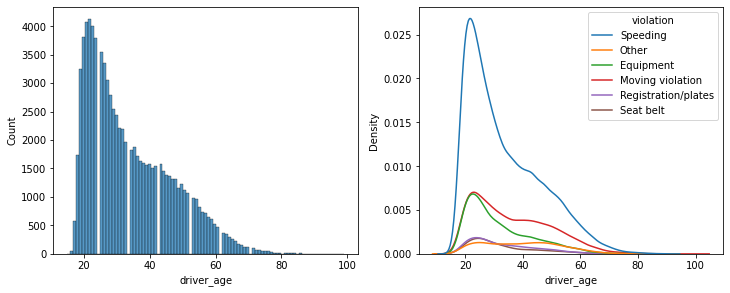

In [238]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.histplot(x='driver_age', data=df)

plt.subplot(2, 2, 2)
sns.kdeplot(x='driver_age', hue='violation', data=df)

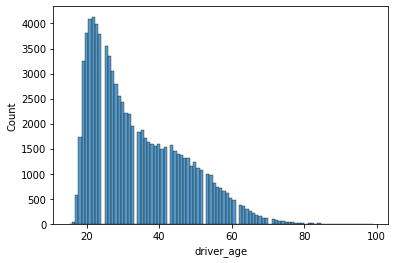

In [239]:
sns.histplot(x='driver_age', data=df)

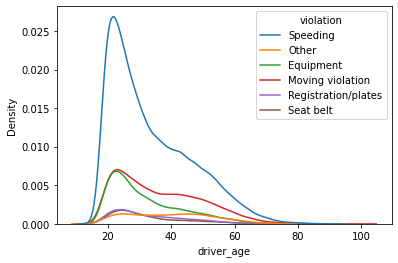

In [240]:
sns.kdeplot(x='driver_age', hue='violation', data=df)

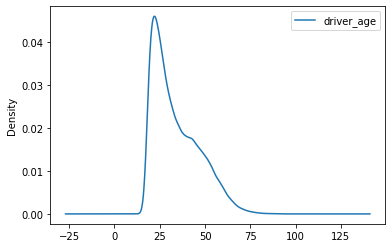

In [241]:
df.plot.kde(y='driver_age')

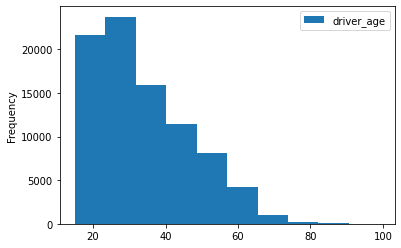

In [242]:
df.plot.hist(y='driver_age', by='violation')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb771ae9ee0>],
      dtype=object)

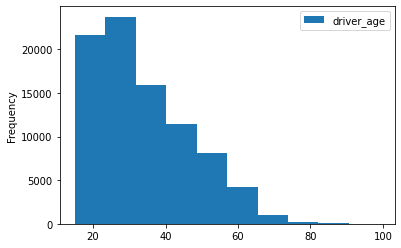

In [243]:
df.plot.hist(y='driver_age', by='violation', subplots=True)

In [244]:
minAge=min(df['driver_age'])
maxAge=max(df['driver_age'])
meanAge=df['driver_age'].mean()
print('Osoba sa najmanjim godinama :',minAge)
print('Osoba sa najvećim godinama :',maxAge)
print('Mean godine :',round(meanAge,2))

Osoba sa najmanjim godinama : 15.0
Osoba sa najvećim godinama : 99.0
Mean godine : 34.02


In [245]:
young=df[(df['driver_age']>=15)&(df['driver_age']<30)]
middle=df[(df['driver_age']>=30)&(df['driver_age']<60)]
elderly=df[(df['driver_age']>=60)]
print('Mladi :',len(young))
print('Osobe srednje životne dobi :',len(middle))
print('Osobe starije životne dobi :',len(elderly))

Mladi : 40718
Osobe srednje životne dobi : 42100
Osobe starije životne dobi : 3589


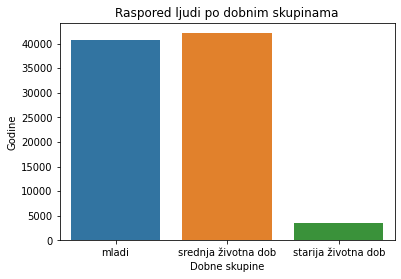

In [246]:
sns.barplot(x=['mladi','srednja životna dob','starija životna dob'],y=[len(young),len(middle),len(elderly)])
plt.xlabel('Dobne skupine')
plt.ylabel('Godine')
plt.title('Raspored ljudi po dobnim skupinama')
plt.show()

Odnos među značajkama.

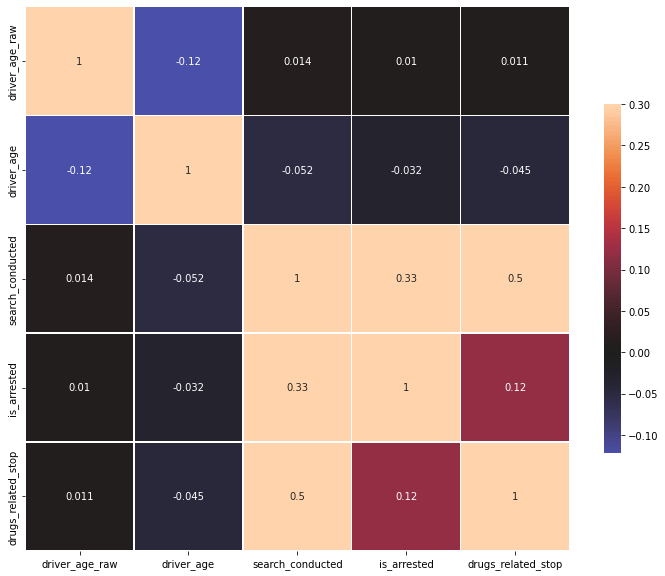

In [247]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)
plt.tight_layout()
plt.show()

Uočimo da su varijable približno nezavisne jer je koeficijent korelacije među njima kreće oko 0. Varijable kod kojih je jača povezanost su: search_conducted i is_arested te search_conducted i drugs_related_stop.

#Zbog čega najčešće policija zaustavlja vozače?

In [248]:
print(df[df.driver_gender == "M"].violation.value_counts())
print('--------------------------------------------------------')
print(df[df.driver_gender == "M"].violation.value_counts(normalize=True))

Speeding               32979
Moving violation       13020
Equipment               8533
Other                   3627
Registration/plates     2419
Seat belt               2317
Name: violation, dtype: int64
--------------------------------------------------------
Speeding               0.524350
Moving violation       0.207012
Equipment              0.135671
Other                  0.057668
Registration/plates    0.038461
Seat belt              0.036839
Name: violation, dtype: float64


In [249]:
print(df[df.driver_gender == "F"].violation.value_counts())
print('--------------------------------------------------------')
print(df[df.driver_gender == "F"].violation.value_counts(normalize=True))

Speeding               15484
Moving violation        3204
Equipment               2486
Registration/plates     1013
Other                    690
Seat belt                635
Name: violation, dtype: int64
--------------------------------------------------------
Speeding               0.658557
Moving violation       0.136271
Equipment              0.105733
Registration/plates    0.043084
Other                  0.029347
Seat belt              0.027007
Name: violation, dtype: float64


Text(0.5, 1.0, 'Violation vs Driver Gender Distribution')

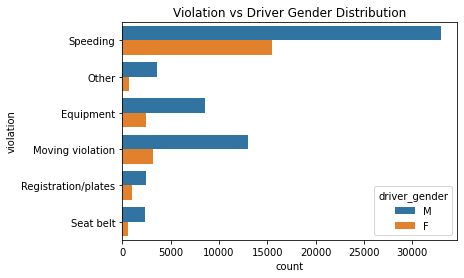

In [250]:
sns.countplot(y='violation', data=df, hue='driver_gender', orient='h')
plt.title("Violation vs Driver Gender Distribution")
# plt.xticks(rotation=90)

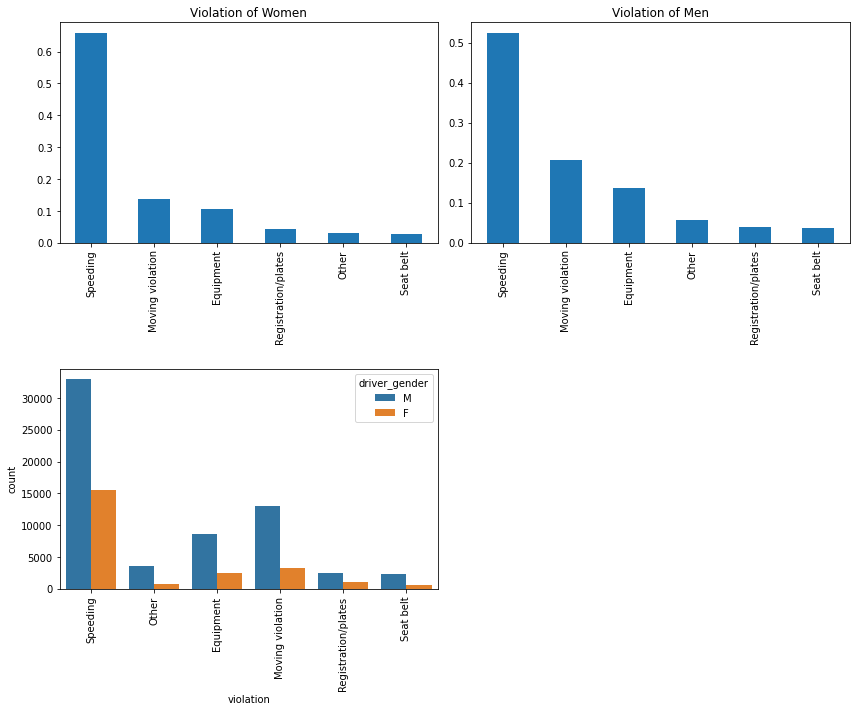

In [251]:
plt.figure(figsize=(12, 18))

plt.subplot(4, 2, 1)
df[df.driver_gender == "F"].violation.value_counts(normalize=True).plot(kind="bar")
plt.title("Violation of Women")

plt.subplot(4, 2, 2)
df[df.driver_gender == "M"].violation.value_counts(normalize=True).plot(kind="bar")
plt.title("Violation of Men")

plt.subplot(4, 2, 3)
sns.countplot(x='violation', data=df, hue='driver_gender')
plt.xticks(rotation=90)

plt.tight_layout();

Brza vožnja je najčešći razlog zaustavljanja vozača.

#Koja godina je imala najmanji broj zaustavljanja?

In [252]:
df.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [253]:
print(df.stop_date.dtype)
print(df.stop_time.dtype)

object
object


In [254]:
df.stop_date

0        2005-01-02
1        2005-01-18
2        2005-01-23
3        2005-02-20
4        2005-03-14
            ...    
91736    2015-12-31
91737    2015-12-31
91738    2015-12-31
91739    2015-12-31
91740    2015-12-31
Name: stop_date, Length: 86407, dtype: object

In [255]:
df['stop_date'] = pd.to_datetime(df.stop_date, format="%Y-%M-%d")
df["year"] = df.stop_date.dt.year

In [256]:
df.dtypes

stop_date             datetime64[ns]
stop_time                     object
driver_gender                 object
driver_age_raw               float64
driver_age                   float64
driver_race                   object
violation_raw                 object
violation                     object
search_conducted                bool
search_type                   object
stop_outcome                  object
is_arrested                     bool
stop_duration                 object
drugs_related_stop              bool
year                           int64
dtype: object

In [257]:
df.year.value_counts()

2012    10395
2006    10142
2007     8905
2014     8849
2015     8232
2008     8151
2011     7575
2013     7421
2009     7237
2010     6995
2005     2505
Name: year, dtype: int64

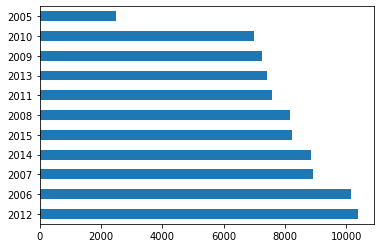

In [258]:
df.year.value_counts().plot.barh()

Iz grafa vidimo da je 2005.godina imala najmanji broj zaustavljanja.

#Događa li se većina zaustavljanja noću?

In [259]:
df.stop_time.sort_index().value_counts()

10:00    301
11:00    298
09:00    274
09:30    272
10:30    272
        ... 
05:09      1
05:18      1
04:48      1
05:14      1
05:35      1
Name: stop_time, Length: 1432, dtype: int64

Text(0, 0.5, 'Count')

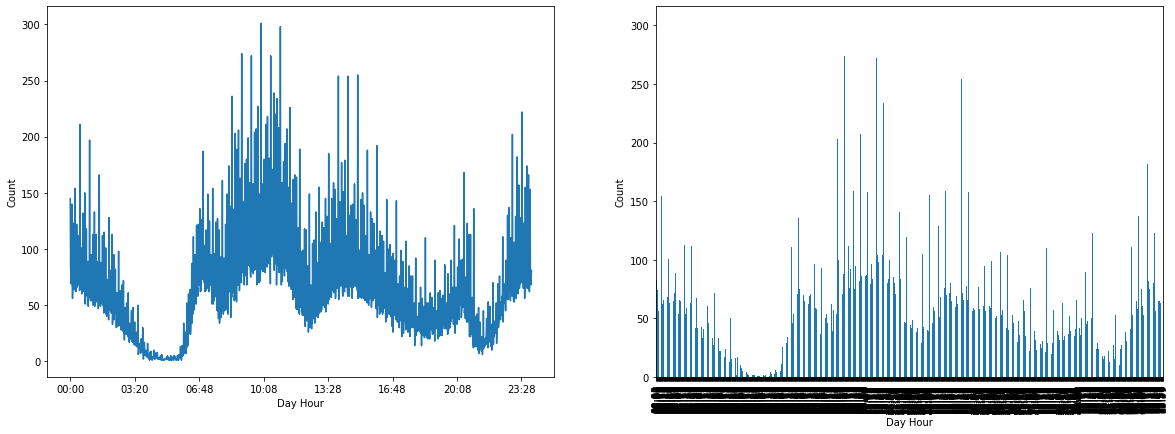

In [260]:
plt.figure(figsize=(20, 15))

plt.subplot(2, 2, 1)
df.stop_time.sort_index().value_counts().sort_index().plot()
plt.xlabel("Day Hour")
plt.ylabel("Count")

plt.subplot(2, 2, 2)
df.stop_time.sort_index().value_counts().sort_index().plot(kind="bar")
plt.xlabel("Day Hour")
plt.ylabel("Count")

Iz grafa vidimo da nije istina da se uglavnom noću događaju zaustavljanja.

#Tijekom pretrage, koliko često se vozači kontroliraju?

In [261]:
df.search_type.value_counts()

Incident to Arrest                                          33291
Probable Cause                                              24051
Inventory                                                    6134
Reasonable Suspicion                                         5007
Protective Frisk                                             4164
Incident to Arrest,Inventory                                 3516
Incident to Arrest,Probable Cause                            2560
Probable Cause,Reasonable Suspicion                          2523
Incident to Arrest,Inventory,Probable Cause                   996
Probable Cause,Protective Frisk                               857
Incident to Arrest,Protective Frisk                           697
Incident to Arrest,Reasonable Suspicion                       459
Inventory,Probable Cause                                      446
Inventory,Protective Frisk                                    288
Incident to Arrest,Probable Cause,Protective Frisk            268
Incident t

In [262]:
from collections import Counter

st = df.search_type.dropna()

search_count = Counter()
for search in st.str.split(','):
    search_count.update(search)

In [263]:
dict(search_count)

{'Incident to Arrest': 42408,
 'Protective Frisk': 6868,
 'Probable Cause': 32079,
 'Reasonable Suspicion': 8814,
 'Inventory': 11964}

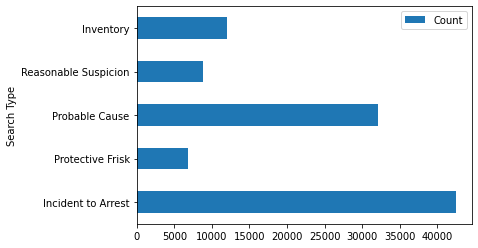

In [264]:
search_count_dict = dict(search_count)
pd.DataFrame(search_count_dict.items(), columns=['Search Type', 'Count']).plot.barh(x='Search Type', y='Count')


In [265]:
df.search_type.str.contains('Protective Frisk').sum()

6868

In [266]:
df.search_type.str.contains('Protective Frisk').mean()

0.07950638435803341

8.57% vremena, vozači se kontroliraju.

#Jesu li češće žene ili muškarci zaustavljeni zbog brze vožnje?

In [267]:
df.driver_gender.value_counts()

M    62895
F    23512
Name: driver_gender, dtype: int64

In [268]:
df.driver_gender.value_counts(normalize=True)

M    0.727892
F    0.272108
Name: driver_gender, dtype: float64

In [269]:
df['violation'].value_counts()

Speeding               48463
Moving violation       16224
Equipment              11019
Other                   4317
Registration/plates     3432
Seat belt               2952
Name: violation, dtype: int64

In [270]:
df['violation'].value_counts(normalize=True)

Speeding               0.560869
Moving violation       0.187763
Equipment              0.127524
Other                  0.049961
Registration/plates    0.039719
Seat belt              0.034164
Name: violation, dtype: float64

Text(0.5, 1.0, 'Men & Women Distribution (Violation = Speeding)')

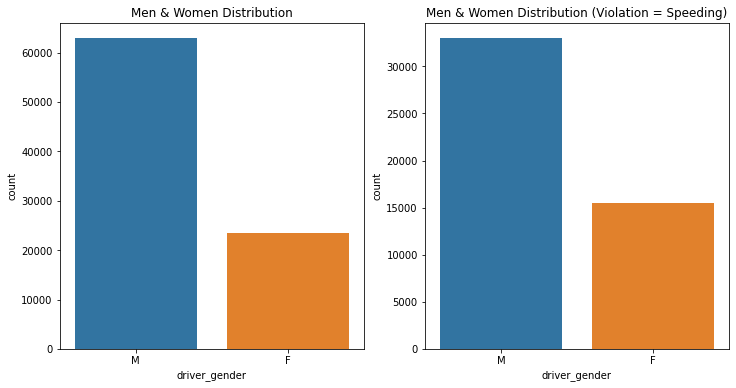

In [271]:
speed_violation = df[df.violation == 'Speeding']

fig = plt.figure(figsize=(12, 6))

plt.subplot(1,2,1)
sns.countplot(x='driver_gender', data=df)
plt.title('Men & Women Distribution')

plt.subplot(1,2,2)
sns.countplot(x='driver_gender', data=speed_violation)
plt.title('Men & Women Distribution (Violation = Speeding)')

Odgovarajući na ovo pitanje, moramo uzeti u obzir ne-ekvivalentnu distribuciju podataka.

In [272]:
df[df.violation == 'Speeding'].driver_gender.value_counts()

M    32979
F    15484
Name: driver_gender, dtype: int64

In [273]:
print(f"Postotak muškaraca koji su brzo vozili: 32979 / 62895 = {round(32979 / 62895 * 100, 2)}% \nPostotak žena koje su brzo vozile: 15484 / 23512 = {round(15484 / 23512 * 100, 2)}%")

Postotak muškaraca koji su brzo vozili: 32979 / 62895 = 52.44% 
Postotak žena koje su brzo vozile: 15484 / 23512 = 65.86%


Mogli bi zaključiti da žene češće brzo voze nego muškarci, no tvrdnju bi najbolje bilo provjeriti statističkim testom. <br> Pokažimo sada te podatke grafički.

In [274]:
df[df.violation == 'Speeding'].driver_gender.value_counts(normalize=True)

M    0.680499
F    0.319501
Name: driver_gender, dtype: float64

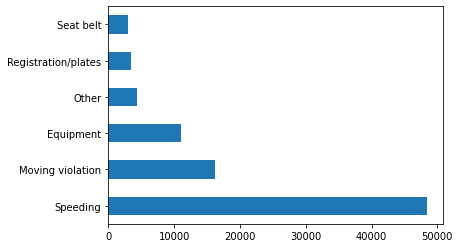

In [275]:
df['violation'].value_counts().plot.barh()

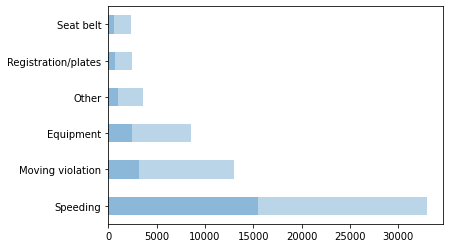

In [276]:
men = df.loc[df['driver_gender']=='F', 'violation'].value_counts().plot.barh(alpha=0.3) 
women = df.loc[df['driver_gender']=='M', 'violation'].value_counts().plot.barh(alpha=0.3)

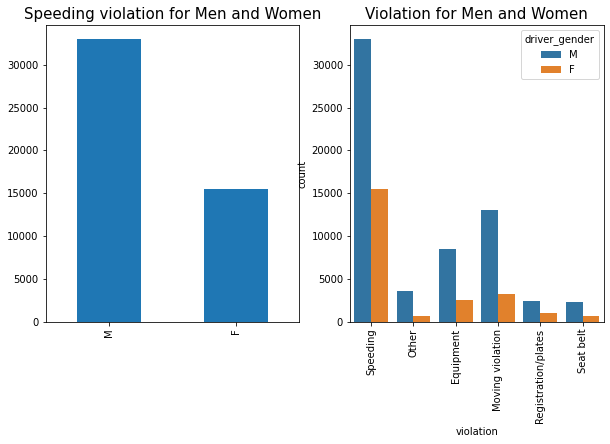

In [277]:
plt.figure(figsize=(10, 12))

plt.subplot(2, 2, 1)
df[df.violation == 'Speeding'].driver_gender.value_counts().plot(kind="bar")
plt.title("Speeding violation for Men and Women", fontsize=15)

plt.subplot(2, 2, 2)
sns.countplot(x='violation', data=df, hue='driver_gender')
plt.title("Violation for Men and Women", fontsize=15)
plt.xticks(rotation=90);

#Utječe li spol na kontrolu vozila prilikom zaustavljanja?

In [278]:
print(df.search_conducted.value_counts())

print(df.search_conducted.value_counts(normalize=True))

False    83211
True      3196
Name: search_conducted, dtype: int64
False    0.963012
True     0.036988
Name: search_conducted, dtype: float64


Od 88545 zaustavljenih osoba, prekontrolirano je njih 3196.

In [279]:
df.loc[df.search_conducted, 'driver_gender'].value_counts()

M    2725
F     471
Name: driver_gender, dtype: int64

In [280]:
df.loc[df.search_conducted, 'driver_gender'].value_counts(normalize=True)

M    0.852628
F    0.147372
Name: driver_gender, dtype: float64

Od ukupnog broja prekontroliranih vozila, 2725 je muškaraca, a žena je 471.

In [281]:
df.driver_gender.value_counts()

M    62895
F    23512
Name: driver_gender, dtype: int64

In [282]:
print(f"Postotak kontroliranih muškaraca: 2725 / 62895 = {round(2725 / 62895 * 100, 2)}% \nPostotak kontroliranih žena: 471 / 23512 = {round(471 / 23512 * 100, 2)}%")

Postotak kontroliranih muškaraca: 2725 / 62895 = 4.33% 
Postotak kontroliranih žena: 471 / 23512 = 2.0%


Uočimo da se od zaustavljenih vozača, muškarce puno češće kontroliralo. <br>
Pokažimo sada te podatke i grafički.

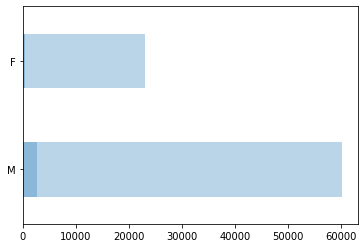

In [283]:
searched = df.loc[df['search_conducted']==True, 'driver_gender'].value_counts().plot.barh(alpha=0.3) 
not_searched = df.loc[df['search_conducted']==False, 'driver_gender'].value_counts().plot.barh(alpha=0.3)

Text(0.5, 1.0, 'Search Conducted by Gender (2725-85%| Men)/(471-15%| Woman)')

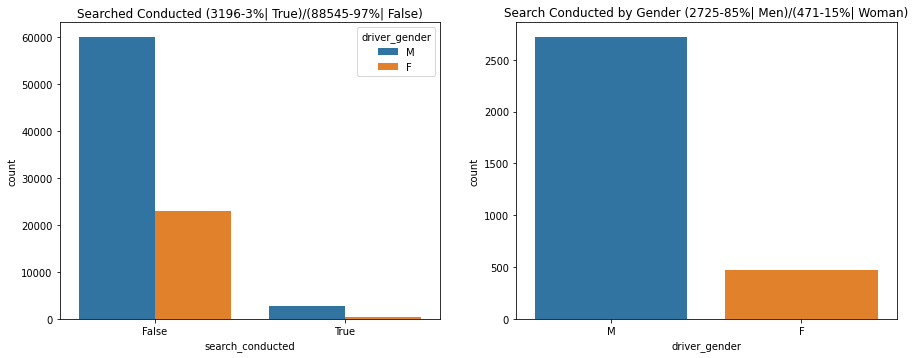

In [284]:
plt.figure(figsize=(15, 12))

plt.subplot(2, 2, 1)
sns.countplot(x='search_conducted', hue='driver_gender', data=df)
plt.title("Searched Conducted (3196-3%| True)/(88545-97%| False)")

plt.subplot(2, 2, 2)
searched = df[df['search_conducted']==True]
sns.countplot(x='driver_gender', data=searched)
plt.title("Search Conducted by Gender (2725-85%| Men)/(471-15%| Woman)")

In [285]:
df.groupby(['violation', 'driver_gender']).search_conducted.mean()

violation            driver_gender
Equipment            F                0.042639
                     M                0.070081
Moving violation     F                0.036205
                     M                0.059831
Other                F                0.056522
                     M                0.047146
Registration/plates  F                0.066140
                     M                0.110376
Seat belt            F                0.012598
                     M                0.037980
Speeding             F                0.008719
                     M                0.024925
Name: search_conducted, dtype: float64

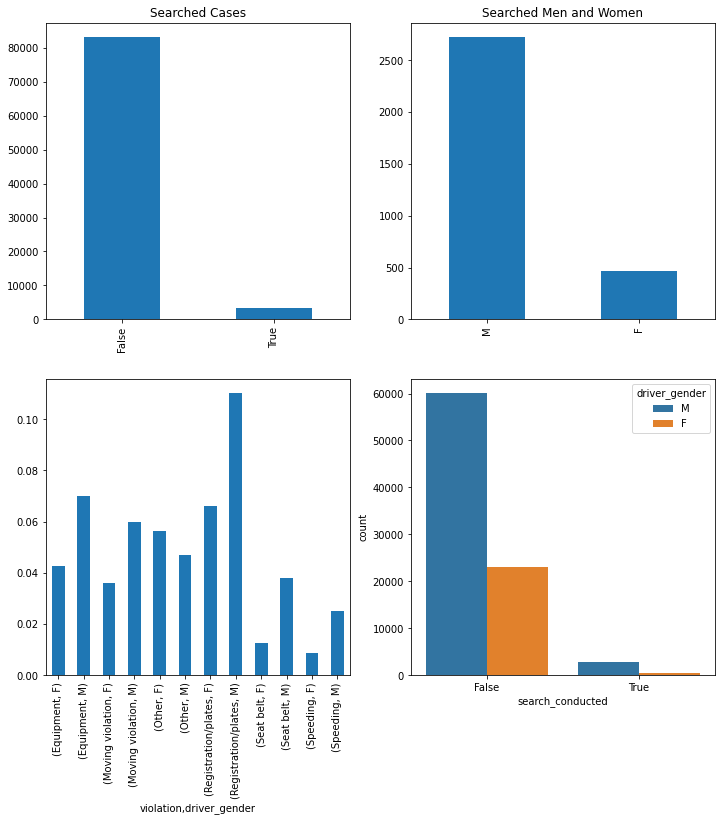

In [286]:
plt.figure(figsize=(12, 12))

plt.subplot(2, 2, 1)
df.search_conducted.value_counts().plot(kind="bar")
plt.title("Searched Cases")

plt.subplot(2, 2, 2)
df.loc[df.search_conducted, 'driver_gender'].value_counts().plot(kind="bar")
plt.title("Searched Men and Women")

plt.subplot(2, 2, 3)
df.groupby(['violation', 'driver_gender']).search_conducted.mean().plot(kind="bar")

plt.subplot(2, 2, 4)
sns.countplot(x='search_conducted', data=df, hue='driver_gender')

#Statistička značajnost

**Zanima nas postoji li statistička značajnost između prosječne dobi muškaraca i žena koje je policija zaustavila** <br><br>
**$H_0$**: Srednja vrijednost dobi muškaraca i žena koje je policija zaustavila je ista <br>
$\left(H_0:  \mu_{m} =\mu_{f}\right)$
<br><br>**$H_1$**: Srednja vrijednost dobi muškaraca i žena koje je policija zaustavila se razlikuje<br>
$\left(H_1:  \mu_{2010} \neq\mu_{2013}\right)$

In [287]:
m_dob = df[df.driver_gender == "M"].driver_age
z_dob = df[df.driver_gender == "F"].driver_age

In [288]:
print(f"Muškarci: mean = {m_dob.mean()}, std = {m_dob.std()}")
print(f"Žene: mean = {z_dob.mean()}, std = {z_dob.std()}")

Muškarci: mean = 34.5432387312187, std = 12.912827829709137
Žene: mean = 32.60373426335488, std = 12.15698254425543


Provjerimo jesu li podatci normalno distribuirani

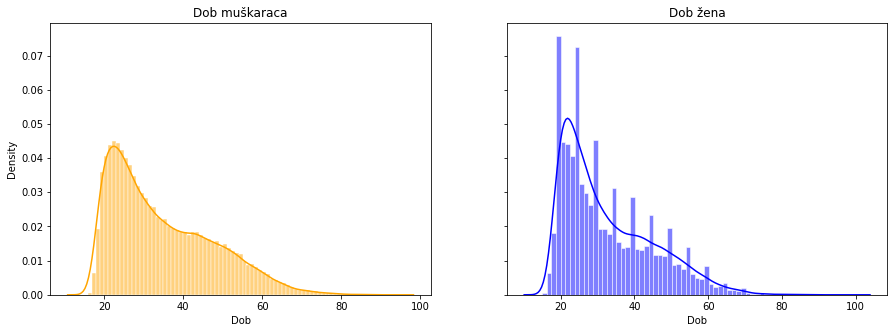

In [289]:
# distribucije
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
axes[0].set_title('Dob muškaraca')
axes[0].set_xlabel("Dob")
sns.histplot(m_dob, stat='density', alpha=0.5, color='orange', edgecolor='white',ax=axes[0])
sns.kdeplot(m_dob,  color='orange', ax=axes[0])
axes[1].set_title('Dob žena')
axes[1].set_xlabel("Dob")
sns.histplot(z_dob, stat='density', alpha=0.5, color='blue', edgecolor='white', ax=axes[1])
sns.kdeplot(z_dob,  color='blue', ax=axes[1]);

Očito je da distribucija nije normalna, no pokažimo to i pomoću testa

In [290]:
statistic, pvalue = stats.normaltest(m_dob)
print(f"pvalue: {pvalue}")
print(f"pvalue < 0.05: {pvalue < 0.05}")

pvalue: 0.0
pvalue < 0.05: True


In [291]:
statistic, pvalue = stats.normaltest(z_dob)
print(f"pvalue: {pvalue}")
print(f"pvalue < 0.05: {pvalue < 0.05}")

pvalue: 0.0
pvalue < 0.05: True


p - vrijednost je 0 ( 0 < 0.5), pa hipotezu o normalnoj distribuciji odbacujemo

Kako bismo ispitali statističku značajnost numeričkih podataka koji nisu normalno distribuirani koristimo mannwhitneyu test

In [292]:
statistic, pvalue = stats.mannwhitneyu(m_dob, z_dob)
print(f"pvalue: {pvalue}")
print(f"pvalue < 0.05: {pvalue < 0.05}")

pvalue: 4.145512211563971e-90
pvalue < 0.05: True


**Zaključak:** postoji velika statistička značajnost među dobi zaustavljenih žena i muškaraca

---

**Zanima nas postoji li statistička značajnost između prosječne dobi zaustavljenih s obzirom na rase**

In [293]:
df.driver_race.unique()

array(['White', 'Black', 'Asian', 'Hispanic', 'Other'], dtype=object)

In [294]:
w = df[df.driver_race == "White"].driver_age
b = df[df.driver_race == "Black"].driver_age
a = df[df.driver_race == "Asian"].driver_age
h = df[df.driver_race == "Hispanic"].driver_age
o = df[df.driver_race == "Other"].driver_age

In [295]:
print(w.mean(), b.mean(), a.mean(), h.mean(), o.mean())
print(w.std(), b.std(), a.std(), h.std(), o.std())

34.57842916438753 33.12226396602418 33.57459052678176 31.577740374500316 34.49166666666667
13.252007451513986 11.500544116489513 11.682964771541181 10.581220896052189 11.616606086097336


Provjerimo jesu li distribucije podataka normalne

In [296]:
statistic, pvalue = stats.normaltest(w)
print(f"pvalue: {pvalue}")
statistic, pvalue = stats.normaltest(b)
print(f"pvalue: {pvalue}")
statistic, pvalue = stats.normaltest(a)
print(f"pvalue: {pvalue}")
statistic, pvalue = stats.normaltest(o)
print(f"pvalue: {pvalue}")
statistic, pvalue = stats.normaltest(h)
print(f"pvalue: {pvalue}")

pvalue: 0.0
pvalue: 1.1805247396368237e-266
pvalue: 2.7813698010869283e-57
pvalue: 6.507647117855287e-06
pvalue: 9.13575248099508e-248


p - vrijednosti su manje od 0.05, dakle distribucije nisu normalne

Koristit ćemo Kruskal-Wallis test

In [297]:
statistic, pvalue = stats.kruskal(w,b,a,o, h)
print(f"pvalue: {pvalue}")
print(f"pvalue < 0.05: {pvalue < 0.05}")

pvalue: 2.6605086013244875e-60
pvalue < 0.05: True


In [298]:
sp.posthoc_conover(df, val_col='driver_age', group_col='driver_race', p_adjust = 'holm')

,Asian,Black,Hispanic,Other,White
Asian,1.000000e+00,3.630544e-01,1.137073e-10,0.635882,6.358816e-01
Black,3.630544e-01,1.000000e+00,2.214609e-17,0.290895,4.540761e-09
Hispanic,1.137073e-10,2.214609e-17,1.000000e+00,0.001214,2.741669e-59
Other,6.358816e-01,2.908947e-01,1.213922e-03,1.000000,6.358816e-01
White,6.358816e-01,4.540761e-09,2.741669e-59,0.635882,1.000000e+00


**Zaključak**: Odbacujemo hipotezu tj. prosječne dobi zaustavljenih vozača se razlikuju.

Uočimo da rasa Hispanic najviše odudara od drugih rasa, no i da se White i Black razlikuju.
Napravimo novi skup podataka koji će biti sačinjen od rasa Asian, White i Other.

In [299]:
df_new = df[df.driver_race != "Black"]
df_new = df_new[df_new.driver_race != "Hispanic"]
df_new.driver_race.value_counts()

White    62158
Asian     2259
Other      240
Name: driver_race, dtype: int64

In [300]:
statistic, pvalue = stats.kruskal(w,a,o)
print(f"pvalue: {pvalue}")
print(f"pvalue < 0.05: {pvalue < 0.05}")

pvalue: 0.3566910459573332
pvalue < 0.05: False


In [301]:
sp.posthoc_conover(df_new, val_col='driver_age', group_col='driver_race', p_adjust = 'holm')

,Asian,Other,White
Asian,1.000000,0.698017,0.698017
Other,0.698017,1.000000,0.698017
White,0.698017,0.698017,1.000000


**Zaključak**: p - vrijednost je mnogo veća od 0.05, dakle ne možemo odbaciti hipotezu da su srednje vrijednosti dobi skupina Asian, Other i White jednake. 